In [26]:
library(tidyverse)
library(lubridate)
library(forcats)
options(repr.plot.width=8, repr.plot.height=5, repl.plot.dpi=150)
theme_set(theme_classic())

# Lecture 14: Categorical data & Factors

In this lecture we will use the [General Social Survey](https://gss.norc.org) to study various social indicators in the U.S. The book covers an example extract of this dataset called `gss_cat`. However, it is not up to date; in particular it does not include any data from people who were born after the year 2000 (i.e. almost everyone in this room except the professor). So to make it more relevant, we are going to load a more recent version of the data.

In [34]:
#gss_cat

load(url('https://datasets.stats306.org/gss18.RData'))

gss18.doc

id,description,properties,marginals,text
<chr>,<chr>,<list>,<list>,<chr>
age,Age of respondent,"Data type , Missing-data codes, Record/columns , numeric , 0,98,99 , 1/233-234 , AGE , AGE , AGE","Total Cases: , 64,814 (Range of valid codes: 18-89), AGE",13. Respondent's age
sex,Respondents sex,"Data type , Missing-data code, Record/column , numeric , 0 , 1/297 , SEX , SEX , SEX","44.1 , 55.9 , 100 , 28,614, 36,200, 64,814, 1 , 2 , NA , MALE , FEMALE, Total , SEX , SEX , SEX",23. Code respondent's sex
race,Race of respondent,"Data type , Missing-data code, Record/column , numeric , 0 , 1/298 , RACE , RACE , RACE","80.3 , 14.2 , 5.5 , 100 , 52,033, 9,187 , 3,594 , 64,814, 1 , 2 , 3 , NA , WHITE , BLACK , OTHER , Total , RACE , RACE , RACE , RACE",24. What race do you consider yourself?
educ,Highest year of school completed,"Data type , Missing-data codes, Record/columns , numeric , -1,97-99 , 1/237-238 , EDUC , EDUC , EDUC","0.3 , 0.1 , 0.2 , 0.4 , 0.5 , 0.6 , 1.3 , 1.4 , 4.2 , 3.2 , 4.5 , 5.8 , 30.4 , 8.3 , 11.1 , 4.5 , 12.9 , 3 , 3.7 , 1.4 , 2.2 , NA , NA , 100 , 165 , 47 , 152 , 257 , 319 , 402 , 828 , 879 , 2,724 , 2,083 , 2,880 , 3,743 , 19,663, 5,360 , 7,160 , 2,910 , 8,355 , 1,967 , 2,384 , 920 , 1,439 , 73 , 104 , 64,814, 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 98 , 99 , NA , , , , , , , , , , , , , , , , , , , , , , DK , NA , Total , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC , EDUC",15. What is the highest grade in elementary school or high school that you finished and got credit for?
income,Total family income,"Data type , Missing-data codes, Record/columns , numeric , 0,13-99 , 1/326-327 , INCOME , INCOME , INCOME","1.4 , 2.4 , 2.3 , 2.1 , 2.3 , 2.2 , 2.3 , 3.9 , 11.5 , 8.9 , 9.2 , 51.7 , NA , NA , NA , NA , 100 , 799 , 1,329 , 1,272 , 1,167 , 1,281 , 1,223 , 1,281 , 2,191 , 6,496 , 5,046 , 5,187 , 29,216 , 1,613 , 3,828 , 2,644 , 241 , 64,814 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 0 , 13 , 98 , 99 , NA , LT $1000 , $1000 TO 2999 , $3000 TO 3999 , $4000 TO 4999 , $5000 TO 5999 , $6000 TO 6999 , $7000 TO 7999 , $8000 TO 9999 , $10000 - 14999, $15000 - 19999, $20000 - 24999, $25000 OR MORE, IAP , REFUSED , DK , NA , Total , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME , INCOME","37. In which of these groups did your total family income, from all sources, fall last year before taxes, that is?"
partyid,Political party affiliation,"Data type , Missing-data codes, Record/column , numeric , -1,8,9 , 1/440 , PARTYID , PARTYID , PARTYID","16.1 , 20.6 , 12.1 , 15.4 , 8.9 , 15.4 , 9.8 , 1.7 , NA , NA , 100 , 10,378 , 13,294 , 7,792 , 9,888 , 5,721 , 9,933 , 6,318 , 1,072 , 11 , 407 , 64,814 , 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , NA , STRONG DEMOCRAT , NOT STR DEMOCRAT , IND,NEAR DEM , INDEPENDENT , IND,NEAR REP , NOT STR REPUBLICAN, STRONG REPUBLICAN , OTHER PARTY , DK , NA , Total , PARTYID , PARTYID , PARTYID , PARTYID , PARTYID , PARTYID , PARTYID , PARTYID , PARTYID , PARTYID , PARTYID","56. Generally speaking, do you usually think of yourself as a Republican, Democrat, Independent, or what?"
relig,R's religious preference,"Data type , Missing-data codes, Record/columns , numeric , 0,98,99 , 1/591-592 , RELIG , RELIG , RELIG","57.5 , 24.3 , 2 , 12.1 , 1.7 , 0.3 , 0.2 , 0.1 , 0.2 , 0.2 , 1.2 , 0 , 0.2 , NA , NA , 100 , 37,117 , 15,674 , 1,285 , 7,797 , 1,086 , 198 , 100 , 39 , 153 , 118 , 791 , 31 , 136 , 31 , 258 , 64,814 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 98 , 99 , NA , PROTESTANT , CATHOLIC , JEWISH , NONE , OTHER , BUDDHISM , HINDUISM , OTHER EASTERN , MOSLEM/ISLAM , ORTHODOX-CHRISTIAN , CHRISTIAN , NATIVE AMERICAN , INTER-NONDENOMINATIONAL, DK , NA , Total , RELIG , RELIG , RELIG , RELIG , RELIG , RELIG , RELIG , RELIG

This command has loaded two tables into your workspace: `gss18.raw` contains the raw data, and `gss18.doc` contains 
information about what each column in `gss18.raw` represents:

In [13]:
gss18.raw %>% print

# A tibble: 2,348 × 14
     age  race   sex relig relpast sexbirth sexnow yearsusa unhappy  educ income
   <int> <int> <int> <int>   <int>    <int>  <int>    <int>   <int> <int>  <int>
 1    43     1     1    11       5       NA     NA       NA      NA    14     NA
 2    74     1     2     2      NA        1      1       NA       1    10     12
 3    42     1     1     4       3        2      2       NA      NA    16     12
 4    63     1     2     1      NA        1      1       NA       2    16     NA
 5    71     2     1     2      NA        2      2       NA       1    18     NA
 6    67     1     2     2       4       NA     NA       NA      NA    16     NA
 7    59     2     2     1      NA       NA     NA       NA       2    13     10
 8    43     1     1     2      NA        2      2       NA       2    12     12
 9    62     1     2     4       4        1      1       NA      NA     8      5
10    55     1     1     1      NA        2      2       NA       4    12     12
# … w

## Factors
Except for `age` and `tvhours`, each of the columns in `gss18.raw` is a categorical random variable. (Recall that a random variable is *categorical* if it takes on one of a (small) number of discrete values.) In R we represent categorical variables using *factors*.

To learn the basics, we'll start with a simple example, before returning to the `gss` data:

In [46]:
birth_months = c("Jan", "Feb", "Sep", "Sep", "Dec", "Jan", "Jul", "Aug")  # categorical variable

The *possible* values of a categorical variable are called the *levels*. The levels of `birth_months` are `Jan`, `Feb`, ..., `Dec`. The *actual* values of `birth_months` are just called the values.

*Factors* are the traditional way to represent categorical data in R. To create a factor, we must specify the levels and the values:

In [45]:

birth_months_fac = factor(birth_months, levels=month.abb)
birth_months_fac


[1] Jan  Feb  Sep  <NA> Dec  Jan  Jul  Aug 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you don't specify the levels, R will infer them based on all the observed values of the variable:

In [5]:
factor(birth_months) %>% str

 Factor w/ 6 levels "Aug","Dec","Feb",..: 4 3 6 6 2 4 5 1


It's best to be explicit about the factor levels. This way, if you there are typos or data entry errors, you will catch them more easily:

In [6]:
bad = c("Jan", "Feb", "Sep", "Ser", "Dec", "Jan", "Jul", "Aug")
#                               ^ note typo
# factor(bad)
factor(bad, levels=month.abb)

[1] Jan  Feb  Sep  <NA> Dec  Jan  Jul  Aug 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

### Order
One advantage of factors is that they can be ordered. This enables them to sort and plot in the way you would expect. Compare:

In [47]:
sort(birth_months)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Sep"

In [49]:
sort(birth_months_fac)

[1] Jan Jan Feb Jul Aug Sep Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you specify the factor levels using the `levels=` option, then that will specify the default order. If you do *not* specify the levels, then they will be sorted alphabetically by default:

In [17]:
levels(birth_months_fac)

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [18]:
levels(factor(birth_months))

[1] "Aug" "Dec" "Feb" "Jan" "Jul" "Sep"

Now, back to `gss18`. Let's focus on the [`race`](https://gssdataexplorer.norc.org/variables/82/vshow) column:

In [50]:
gss18.raw %>% select(race) %>% print

# A tibble: 2,348 × 1
    race
   <int>
 1     1
 2     1
 3     1
 4     1
 5     2
 6     1
 7     2
 8     1
 9     1
10     1
# … with 2,338 more rows


These data have been encoded for us into numbers. To get the coding scheme, we can consult the accompanying `gss18.doc` table:

In [64]:
# pull up data on race column

#gss18.doc %>% filter(id == "race") %>% select(marginals) %>% unnest
# 1=white, 2=black, 3=other
# gss18.raw %>% mutate(race = factor(race, labels=c("white", "black", "other")))

gss18

age,race,sex,relig,relpast,sexbirth,sexnow,yearsusa,unhappy,educ,income,phone,tvhours,partyid
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
43,white,male,christian,strongly disagree,NA,NA,NA,NA,14,NA,cellphone,3,not str republican
74,white,female,catholic,NA,female,women,NA,never,10,$25000 or more,phone in home,NA,"ind,near dem"
42,white,male,none,neither agree nor disagree,male,man,NA,NA,16,$25000 or more,phone in home,1,"ind,near rep"
63,white,female,protestant,NA,female,women,NA,rarely,16,NA,phone in home,1,"ind,near dem"
71,black,male,catholic,NA,male,man,NA,never,18,NA,phone in home,NA,strong republican
67,white,female,catholic,disagree,NA,NA,NA,NA,16,NA,phone in home,10,"ind,near dem"
59,black,female,protestant,NA,NA,NA,NA,rarely,13,$15000 - 19999,cellphone,NA,strong democrat
43,white,male,catholic,NA,male,man,NA,rarely,12,$25000 or more,cellphone,NA,not str republican
62,white,female,none,disagree,female,women,NA,NA,8,$5000 to 5999,cellphone,4,independent


Let's convert race in `gss18.raw` from an integer into a factor:

In [35]:
# convert race to factor

# A tibble: 2,348 × 11
     age race    sex relig relpast sexbirth sexnow yearsusa unhappy  educ income
   <int> <fct> <int> <int>   <int>    <int>  <int>    <int>   <int> <int>  <int>
 1    43 white     1    11       5       NA     NA       NA      NA    14     NA
 2    74 white     2     2      NA        1      1       NA       1    10     12
 3    42 white     1     4       3        2      2       NA      NA    16     12
 4    63 white     2     1      NA        1      1       NA       2    16     NA
 5    71 black     1     2      NA        2      2       NA       1    18     NA
 6    67 white     2     2       4       NA     NA       NA      NA    16     NA
 7    59 black     2     1      NA       NA     NA       NA       2    13     10
 8    43 white     1     2      NA        2      2       NA       2    12     12
 9    62 white     2     4       4        1      1       NA      NA     8      5
10    55 white     1     1      NA        2      2       NA       4    12     12
# … w

Notice that the order mattered -- R matched `white` with `1`, `black` with `2`, etc. If we had 
specified `labels=c("black", "white", "other")` it would have given us an incorrect factor.

## 🤔 Quiz

What percent of people in `gss18` identified as 'other' when asked their race?

<ol style="list-style-type: upper-alpha;">
    <li>0-10%</li>
    <li>10-20%</li>
    <li>20-30%</li>
    <li>More than 30%</li>
</ol>


In [73]:
# other

gss18 %>% select(race) %>% table %>% prop.table


race
    white     black     other 
0.7210392 0.1639693 0.1149915 

Now let's do this for all the other categorical variables in `gss18.raw`...

Just kidding! I did the work for you, and stored it in the table `gss18`:

In [139]:
print(gss18)

# A tibble: 2,348 × 13
     age race  sex    relig  relpast sexbi…¹ sexnow years…² unhappy educ  income
   <int> <fct> <fct>  <fct>  <fct>   <fct>   <fct>  <fct>   <fct>   <fct> <fct> 
 1    43 white male   chris… strong… NA      NA     NA      NA      14    NA    
 2    74 white female catho… NA      female  women  NA      never   10    $2500…
 3    42 white male   none   neithe… male    man    NA      NA      16    $2500…
 4    63 white female prote… NA      female  women  NA      rarely  16    NA    
 5    71 black male   catho… NA      male    man    NA      never   18    NA    
 6    67 white female catho… disagr… NA      NA     NA      NA      16    NA    
 7    59 black female prote… NA      NA      NA     NA      rarely  13    $1500…
 8    43 white male   catho… NA      male    man    NA      rarely  12    $2500…
 9    62 white female none   disagr… female  women  NA      NA      8     $5000…
10    55 white male   prote… NA      male    man    NA      often   12    $2500…
# … w

### The `forcats` package
`tidyverse` contains a package that has some tools for working with factors. Sometimes it is not automatically loaded by the `tidyverse` metapackage, in which case you must load it manually:

In [74]:
library(forcats)

`forcats` commands are prefixed by `fct_` (compare `stringr`).

## Generations
Here are the ages of everybody in the dataset:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


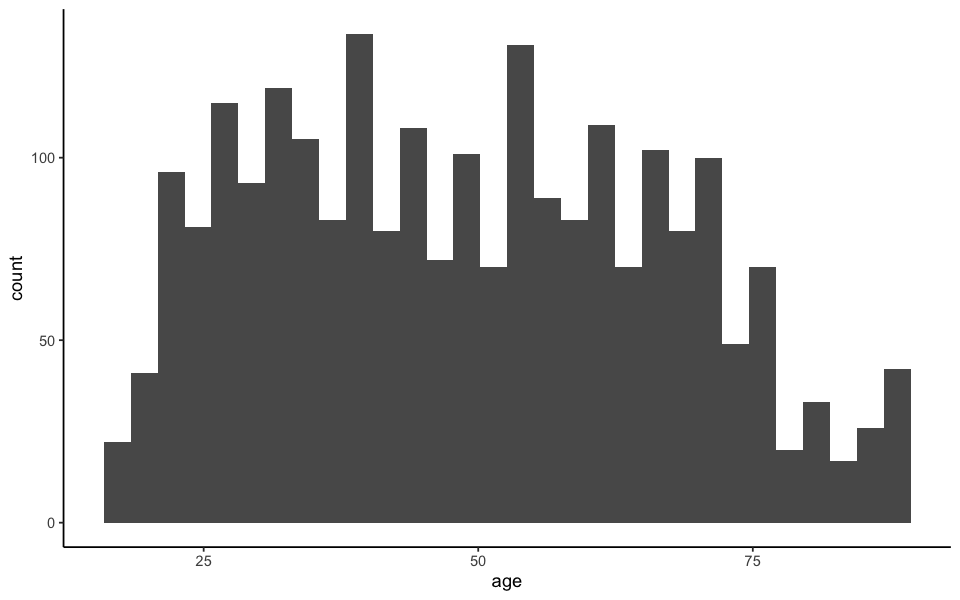

In [75]:
ggplot(gss18) + geom_histogram(aes(x=age)) 

## 🤔 Quiz

In what year was the oldest person in this dataset born?

<ol style="list-style-type: upper-alpha;">
    <li>1910-1919</li>
    <li>1920-1929</li>
    <li>1930-1939</li>
    <li>1940-1949</li>
</ol>


In [77]:
# oldest person

gss18 %>% top_n(1, age)

age,race,sex,relig,relpast,sexbirth,sexnow,yearsusa,unhappy,educ,income,phone,tvhours,partyid
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
89,white,male,catholic,NA,NA,NA,NA,never,8,$25000 or more,phone in home,NA,strong republican
89,white,female,catholic,NA,NA,NA,NA,sometimes,8,$25000 or more,phone in home,2,independent
89,white,female,catholic,NA,female,women,NA,never,12,NA,refused,NA,not str republican
89,white,male,protestant,NA,male,man,NA,sometimes,12,$25000 or more,phone in home,6,"ind,near rep"
89,white,male,catholic,NA,NA,NA,69,NA,5,NA,phone in home,7,strong democrat
89,white,female,protestant,NA,NA,NA,93,rarely,12,NA,phone in home,NA,not str democrat
89,white,male,protestant,disagree,NA,NA,NA,NA,16,$25000 or more,phone in home,1,"ind,near rep"
89,white,male,protestant,NA,male,man,NA,rarely,16,$20000 - 24999,phone in home,NA,not str democrat
89,black,female,protestant,NA,NA,NA,55,sometimes,4,$3000 to 3999,cellphone,NA,strong democrat


Let's define the following generations
- [Silent generation](https://en.wikipedia.org/wiki/Silent_Generation): 1929&mdash;1945
- [Baby boomers](https://en.wikipedia.org/wiki/Baby_boomers): 1946&mdash;1964
- [Gen X](https://en.wikipedia.org/wiki/Generation_X): 1964&mdash;1981
- [Gen Y/Millennial](https://en.wikipedia.org/wiki/Millennials): 1982&mdash;1996
- [Gen Z](https://en.wikipedia.org/wiki/Generation_Z): 1997&mdash;20teens

In [85]:
# create a generations column in gss18

# load(url('https://datasets.stats306.org/gss18.RData'))
gss18 <- gss18 %>% mutate(birth_year = 2018 - age, 
                          generation = cut(birth_year, 
                                           breaks=c(1929, 1945, 1964, 1982, 1997, 2020),
                                           labels=c('silent', 'boomer', 'x', 'millennial', 'z')))

gss18

age,race,sex,relig,relpast,sexbirth,sexnow,yearsusa,unhappy,educ,income,phone,tvhours,partyid,birth_year,generation
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>
43,white,male,christian,strongly disagree,NA,NA,NA,NA,14,NA,cellphone,3,not str republican,1975,x
74,white,female,catholic,NA,female,women,NA,never,10,$25000 or more,phone in home,NA,"ind,near dem",1944,silent
42,white,male,none,neither agree nor disagree,male,man,NA,NA,16,$25000 or more,phone in home,1,"ind,near rep",1976,x
63,white,female,protestant,NA,female,women,NA,rarely,16,NA,phone in home,1,"ind,near dem",1955,boomer
71,black,male,catholic,NA,male,man,NA,never,18,NA,phone in home,NA,strong republican,1947,boomer
67,white,female,catholic,disagree,NA,NA,NA,NA,16,NA,phone in home,10,"ind,near dem",1951,boomer
59,black,female,protestant,NA,NA,NA,NA,rarely,13,$15000 - 19999,cellphone,NA,strong democrat,1959,boomer
43,white,male,catholic,NA,male,man,NA,rarely,12,$25000 or more,cellphone,NA,not str republican,1975,x
62,white,female,none,disagree,female,women,NA,NA,8,$5000 to 5999,cellphone,4,independent,1956,boomer


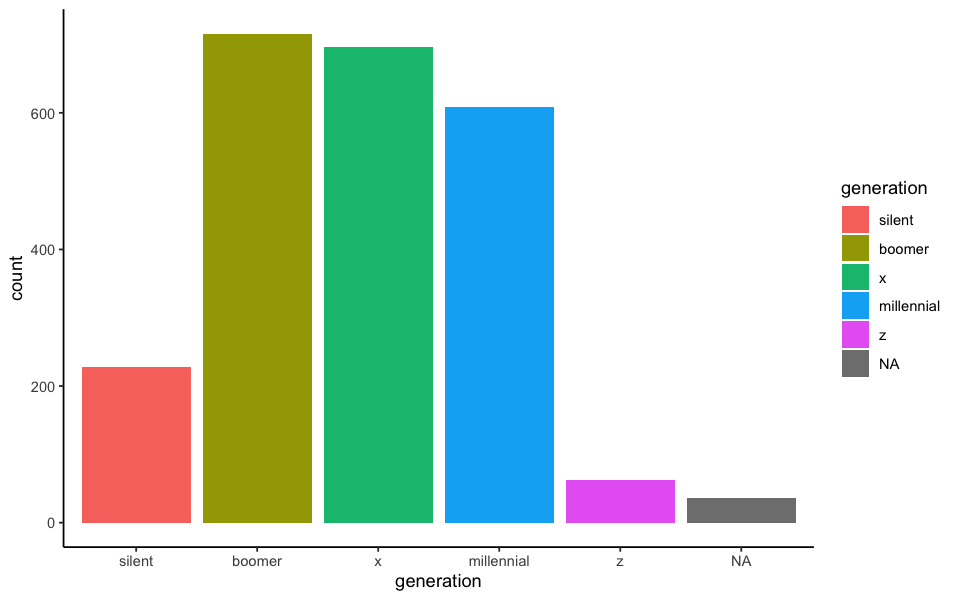

In [86]:
ggplot(gss18) + geom_bar(aes(x=generation, fill=generation))

## Attitudes about religion
Here is the overall distribution of religious affiliation in the data:

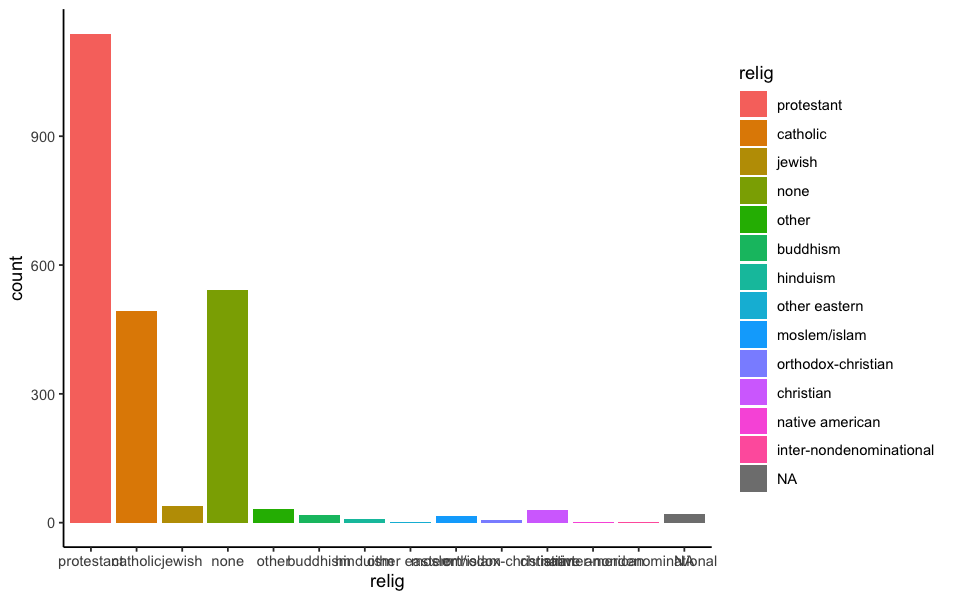

In [89]:
# distribution of religion
ggplot(gss18) + geom_bar(aes(x=relig, fill=relig))

Let's think of ways to improve this jumbled plot. First, we can turn it sideways for better readability:

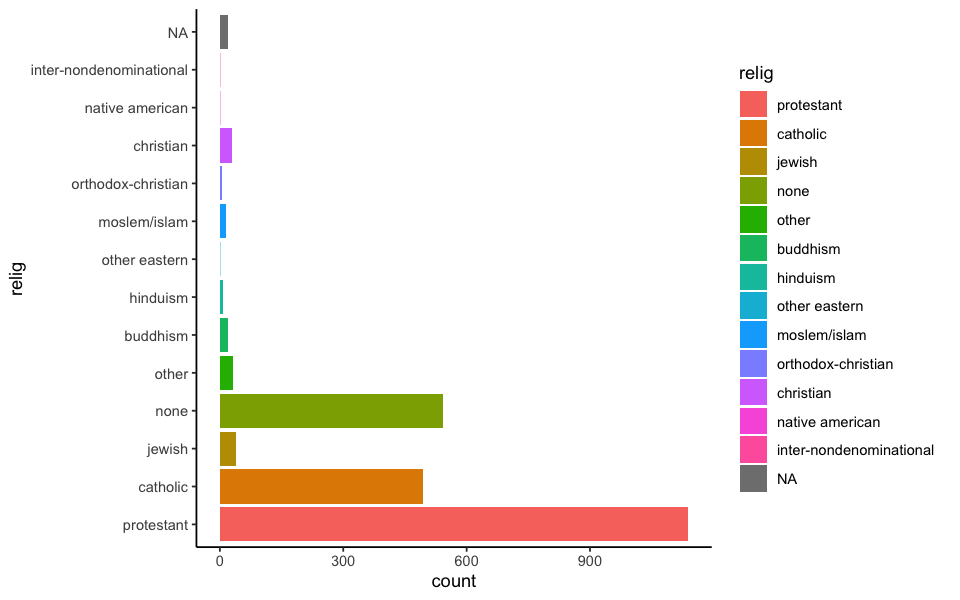

In [91]:
# distribution of religion 

ggplot(gss18) + geom_bar(aes(y=relig, fill=relig))

By default, the order of the labels shown by R corresponds to the order of the factor levels:

In [94]:
# levels of gss18$relig

levels(gss18$relig)

[1] "protestant"              "catholic"               
 [3] "jewish"                  "none"                   
 [5] "other"                   "buddhism"               
 [7] "hinduism"                "other eastern"          
 [9] "moslem/islam"            "orthodox-christian"     
[11] "christian"               "native american"        
[13] "inter-nondenominational"

To improve the appearance of the plot, we can use `fct_infreq` to reorder the levels such in increasing order of frequency:

In [96]:
# sort the levels by their frequency

gss18$relig %>% fct_infreq %>% levels

[1] "protestant"              "none"                   
 [3] "catholic"                "jewish"                 
 [5] "other"                   "christian"              
 [7] "buddhism"                "moslem/islam"           
 [9] "hinduism"                "orthodox-christian"     
[11] "other eastern"           "native american"        
[13] "inter-nondenominational"

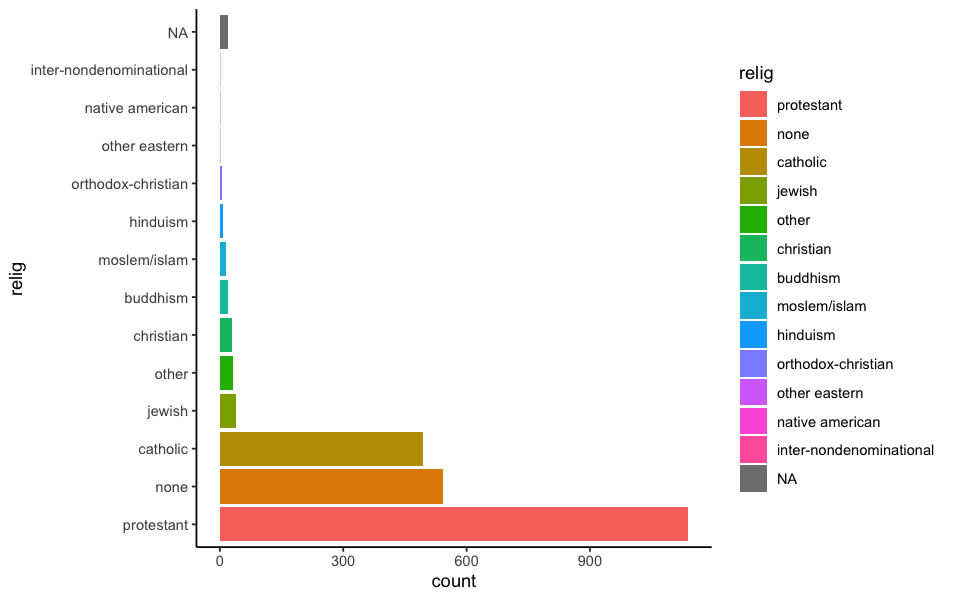

In [98]:
# plot levels sorted by frequency

gss18 %>% mutate(relig = fct_infreq(relig)) %>% 
    ggplot + geom_bar(aes(y=relig, fill=relig))

We may also want to simplify the plot by grouping some factors together. The `fct_lump` command will combine uncommon factor levels into a new level, "other":

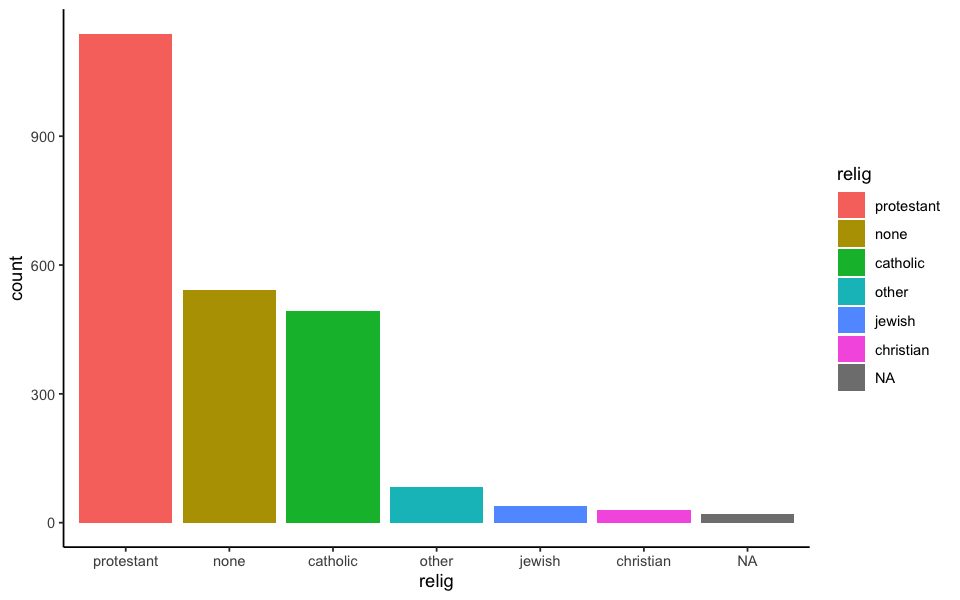

In [106]:
# lump uncommon factors together

gss18 %>% mutate(relig = fct_infreq(fct_lump(relig, other_level = "other", prop = .01))) %>% ggplot +
    geom_bar(aes(x=relig, fill=relig))

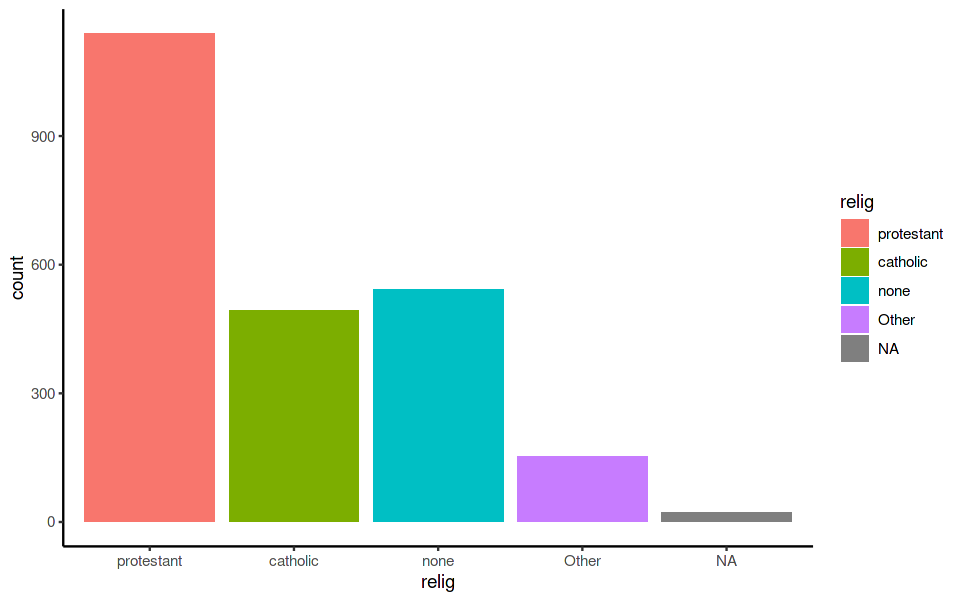

In [149]:
# religions lumped

Be careful with this. Not everybody enjoys being lumped into the "Other" category. A good compromise in this case could be to use one bar for "Other", but still break everyone out in the legend:

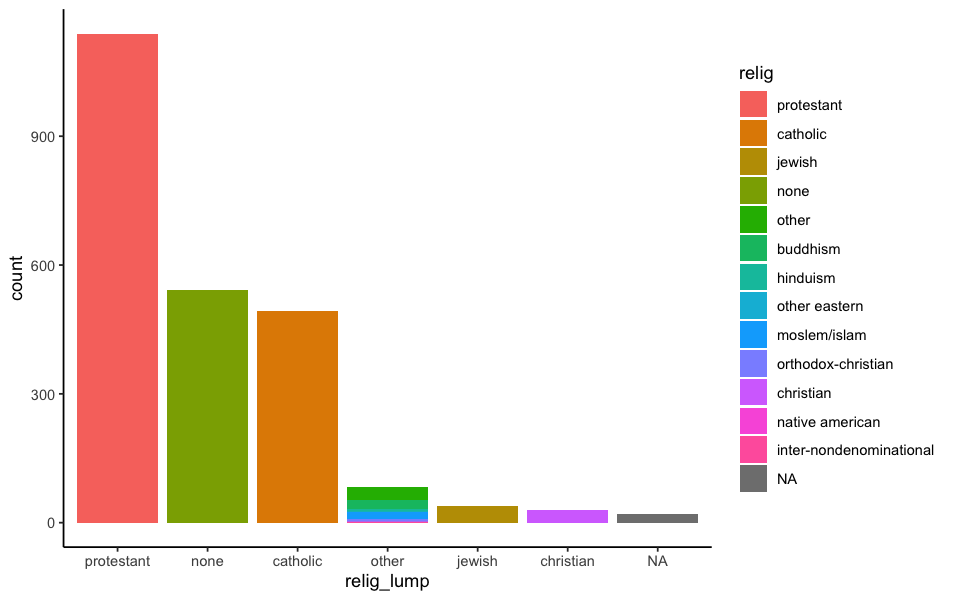

In [107]:
# lumped levels, by still showing the variation

gss18 %>% mutate(relig_lump = fct_infreq(fct_lump(relig, other_level = "other", prop = .01))) %>% ggplot +
    geom_bar(aes(x=relig_lump , fill=relig))

## Religious affiliation by generation
How does religious affiliation vary from one generation to the next? To study this, we will first use a simple table. The `table` command will take a dataframe containing two categorical columns and create a 2-way table of counts from them:

In [117]:
# religious by generation

gss18 %>% mutate(relig = fct_lump(relig)) %>% select(generation, relig) %>% 
    table %>% prop.table(margin=1) %>% round(3)

            relig
generation   protestant catholic  none Other
  silent          0.645    0.202 0.110 0.044
  boomer          0.545    0.232 0.162 0.061
  x               0.482    0.225 0.228 0.065
  millennial      0.388    0.167 0.365 0.079
  z               0.254    0.317 0.333 0.095

We probably want to normalize this table so that the data are expressed as percentages, with the rows summing to one:

In [110]:
# normalize the table 

            relig
generation   protestant catholic none Other
  silent           0.65     0.20 0.10  0.04
  boomer           0.54     0.23 0.17  0.06
  x                0.48     0.22 0.23  0.07
  millennial       0.39     0.17 0.37  0.08
  z                0.25     0.32 0.33  0.10

Not that by normalizing the rows or columns, we are now studying the *conditional* distribution of race given generational status (or vice versa). This was a point of confusion on the midterm.

Next, let's test whether religious affiliation and generational status are statistically independent. To do this, we'll perform a chi-squared test of independence, using `chisq.test()`:

In [121]:
# chi-squared test of independence

gss18 %>% mutate(relig = fct_lump(relig)) %>% select(generation, relig) %>% 
    table %>% chisq.test

Warning message in chisq.test(.):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  .
X-squared = 128.73, df = 12, p-value < 2.2e-16


## Hours of TV watched
How does TV watching vary from generation to generation?

Warning message:
“Removed 793 rows containing non-finite values (`stat_boxplot()`).”


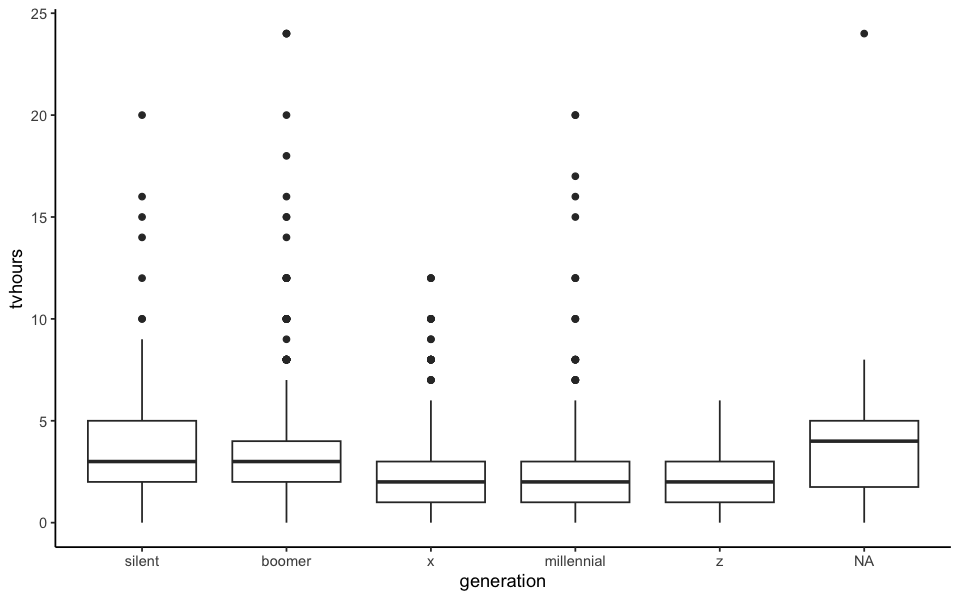

In [125]:
# hours of TV

gss18 %>% select(generation, tvhours) %>% ggplot(aes(x=generation, y=tvhours)) + geom_boxplot()

This plot could maybe be improved by ordering the boxes so that the medians are in ascending order:

Warning message:
“Removed 793 rows containing non-finite values (`stat_boxplot()`).”


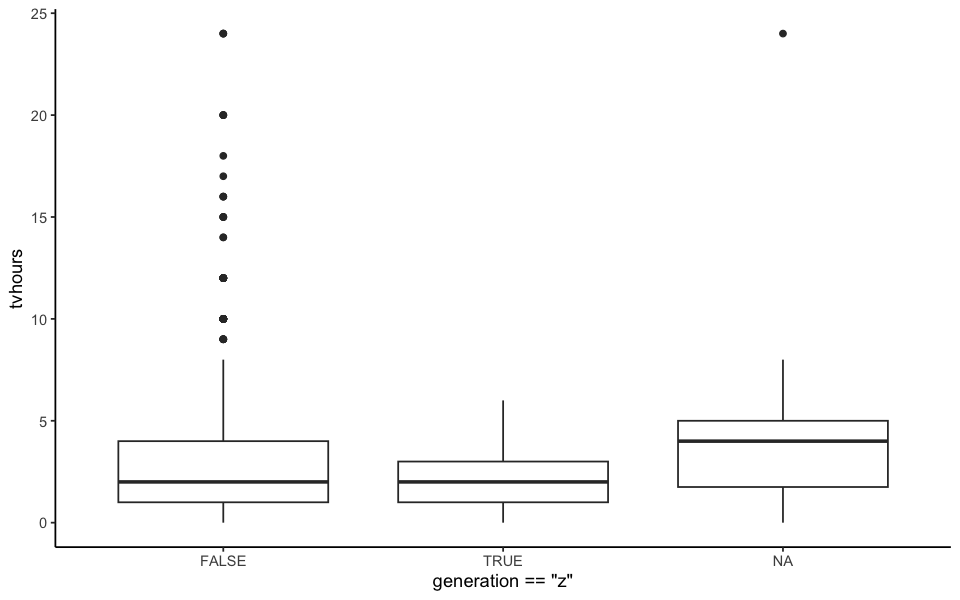

In [136]:
gss18 %>% select(generation, tvhours) %>% 
    ggplot(aes(x=generation == "z", y=tvhours)) + geom_boxplot()

Do gen Z watch significantly less TV than everyone else?

In [146]:
# t.test of means

tv.z <- gss18 %>% filter(generation == "z") %>% pull(tvhours)
tv.nonz <- gss18 %>% filter(generation != "z") %>% pull(tvhours)

t.test(tv.z, tv.nonz)

# lm(tvhours ~ I(generation == "z"), data=gss18) %>% summary


	Welch Two Sample t-test

data:  tv.z and tv.nonz
t = -3.5699, df = 39.516, p-value = 0.0009564
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.5145288 -0.4192897
sample estimates:
mean of x mean of y 
 1.971429  2.938338 


In [164]:
# another way


Call:
lm(formula = tvhours ~ I(generation == "millennial"), data = gss18)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0762 -1.4194 -1.0762  0.9238 20.9238 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.07619    0.08192  37.552  < 2e-16 ***
I(generation == "millennial")TRUE -0.65684    0.16597  -3.958 7.92e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.784 on 1525 degrees of freedom
  (821 observations deleted due to missingness)
Multiple R-squared:  0.01017,	Adjusted R-squared:  0.009517 
F-statistic: 15.66 on 1 and 1525 DF,  p-value: 7.92e-05


Why might this be?

## Phone usage
How many people in each generation use a {land line, cell phone}?

In [177]:
gss18 %>% select(generation, phone) %>% table %>% prop.table(1)

            phone
generation      no phone     refused phone in home phone elsewhere
  silent     0.028000000 0.028000000   0.676000000     0.016000000
  boomer     0.004322767 0.050432277   0.423631124     0.024495677
  x          0.004310345 0.041666667   0.231321839     0.014367816
  millennial 0.003284072 0.016420361   0.090311987     0.003284072
  z          0.000000000 0.047619048   0.174603175     0.031746032
            phone
generation   phone,dk where   cellphone
  silent        0.000000000 0.252000000
  boomer        0.000000000 0.497118156
  x             0.000000000 0.708333333
  millennial    0.000000000 0.886699507
  z             0.000000000 0.746031746

## Political orientation

In [149]:
select(gss18, generation, partyid) %>% table %>% prop.table(1)

            partyid
generation   strong democrat not str democrat ind,near dem independent
  silent          0.20704846       0.11013216   0.14537445  0.12334802
  boomer          0.19456366       0.14163090   0.11158798  0.12732475
  x               0.16204380       0.15474453   0.14160584  0.17518248
  millennial      0.11570248       0.17024793   0.15206612  0.25950413
  z               0.07936508       0.22222222   0.07936508  0.20634921
            partyid
generation   ind,near rep not str republican strong republican other party
  silent       0.09691630         0.11894273        0.18502203  0.01321586
  boomer       0.11015737         0.12017167        0.16309013  0.03147353
  x            0.10656934         0.13430657        0.09635036  0.02919708
  millennial   0.12231405         0.09256198        0.04297521  0.04462810
  z            0.15873016         0.14285714        0.06349206  0.04761905

We can visualize these proportions, but it gets a bit messy because of all the levels.

### Recoding factors
Sometimes we want to recode factors to make their labels more interpretable/plottable/whatever. We can use `fct_recode` to this. The syntax is

    fct_recode(<factor>, "new_level1" = "old level1", "new level2" = "old level2", ...)
    
A useful feature of `fct_recode` is for combining multiple factors into one:

In [160]:
# lump everyone into Democrat, Independent, Republican, or Other

gss18 %>% mutate(partyid = fct_recode(partyid,
    "democrat" = "strong democrat",
    "democrat" = "not str democrat",
    "democrat" = "ind,near dem",
    "republican" = "ind,near rep",
    "republican" = "not str republican",
    "republican" = "strong republican",
)) %>% select(generation, partyid) %>% table %>% prop.table(1) %>% round(3)

            partyid
generation   democrat independent republican other party
  silent        0.463       0.123      0.401       0.013
  boomer        0.448       0.127      0.393       0.031
  x             0.458       0.175      0.337       0.029
  millennial    0.438       0.260      0.258       0.045
  z             0.381       0.206      0.365       0.048

If there are many levels this gets repetitious, so we have an additional command called `fct_collapse` which is specifically designed to handle this case:

In [206]:
gss18 %>%
  mutate(partyid = fct_collapse(partyid,
    Other = c("no answer", "don't know", "other party"),
    Republican = c("strong republican", "not str republican"),
    Independent = c("ind,near rep", "independent", "ind,near dem"),
    Democrat = c("not str democrat", "strong democrat")
  )) %>%
  count(partyid)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `partyid = fct_collapse(...)`.
Caused by warning:
! Unknown levels in `f`: no answer, don't know”


partyid,n
<fct>,<int>
Democrat,731
Independent,980
Republican,527
Other,77
NA,33


## Party affiliation across generations
How does general party affiliation vary across generations?

## Happiness
The `unhappy` survey question asks:

In [300]:
gss18.doc %>% filter(id=='unhappy') %>% select(description)

description
<chr>
How often R was unhappy or depressed in past 4 weeks


How does happiness vary with political orientation?

In [306]:
# happiness v politics

                    unhappy
partyid                    never      rarely   sometimes       often
  strong democrat    0.406417112 0.320855615 0.197860963 0.064171123
  not str democrat   0.287425150 0.371257485 0.191616766 0.107784431
  ind,near dem       0.300613497 0.349693252 0.239263804 0.085889571
  independent        0.352941176 0.310160428 0.203208556 0.074866310
  ind,near rep       0.372093023 0.310077519 0.263565891 0.046511628
  not str republican 0.442028986 0.318840580 0.152173913 0.065217391
  strong republican  0.464285714 0.335714286 0.157142857 0.028571429
  other party        0.333333333 0.404761905 0.166666667 0.071428571
                    unhappy
partyid               very often
  strong democrat    0.010695187
  not str democrat   0.041916168
  ind,near dem       0.024539877
  independent        0.058823529
  ind,near rep       0.007751938
  not str republican 0.021739130
  strong republican  0.014285714
  other party        0.023809524